# Circles

### Finding a Circle tangent to 3 circles
In the figure below, trying to find the red cirle parameters can be thought of as imagining the center of the red circle as a point on a circle that is centered at $(a_i,b_i)$ with radius $r_i + r$. So the folowing three equations are satisfied.

$$  (a - a_1)^2 + (b - b_1)^2 = (r + r_1)^2 $$
$$  (a - a_2)^2 + (b - b_2)^2 = (r + r_2)^2 $$
$$  (a - a_3)^2 + (b - b_3)^2 = (r + r_3)^2 $$


![Circles_img](lib/Circles.png)



$$  a^2 - 2a \cdot a_1 + a_1^2 + b^2 - 2b \cdot b_1 + b_1^2 = r^2 + 2r \cdot r_1 + r_1^2 $$

$$  a^2 - 2a \cdot a_2 + a_2^2 + b^2 - 2b \cdot b_2 + b_2^2 = r^2 + 2r \cdot r_2 + r_2^2 $$

$$  a^2 - 2a \cdot a_3 + a_3^2 + b^2 - 2b \cdot b_3 + b_3^2 = r^2 + 2r \cdot r_3 + r_3^2 $$


Substract the equations,


$$ a \cdot (a_1-a_2)  + b \cdot (b_1-b_2)  + r \cdot (r_1-r_2) =  (-1/2) (r_1^2 - r_2^2 - a_1^2 + a_2^2 - b_1^2 + b_2^2)$$

$$ a \cdot (a_2-a_3)  + b \cdot (b_2-b_3)  + r \cdot (r_2-r_3) =  (-1/2) (r_2^2 - r_3^2 - a_2^2 + a_3^2 - b_2^2 + b_3^2)$$

$$ a \cdot (a_3-a_1)  + b \cdot (b_3-b_1)  + r \cdot (r_3-r_1) =  (-1/2) (r_3^2 - r_1^2 - a_3^2 + a_1^2 - b_3^2 + b_1^2)$$



$$ 
-2 \begin{bmatrix} a_1-a_2 & b_1-b_2 & r_1-r_2 \\ 
                   a_2-a_3 & b_2-b_3 & r_2-r_3 \\ 
                   a_3-a_1 & b_3-b_1 & r_3-r_1 \end{bmatrix}    
\begin{bmatrix} a \\ b \\ r \end{bmatrix} 
= \begin{bmatrix} r_1^2 - r_2^2 - a_1^2 + a_2^2 - b_1^2 + b_2^2 \\ 
                  r_2^2 - r_3^2 - a_2^2 + a_3^2 - b_2^2 + b_3^2 \\ 
                  r_3^2 - r_1^2 - a_3^2 + a_1^2 - b_3^2 + b_1^2 \end{bmatrix}$$

Notice, this is not the only configuration. We could have the red circle tangent on the inside of a blue cirle.

![Circles_img](lib/Circles2.png)

Notice that this just changes the Radius to act like a negative radius in the equations. So solving the above equations and changing th radius to negative should yield all the solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu, lu_factor
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
# %matplotlib widget
# %matplotlib inline
# %matplotlib qt
# %matplotlib notebook 

In [2]:
def circle(x, y, r):
    return [(x,y), r]

In [3]:
# def equation_subtract(circle1, circle2, circle3):
#     a1,b1 = circle1[0]
#     a2,b2 = circle2[0]
#     a3,b3 = circle3[0]
    
#     r1 = circle1[1]
#     r2 = circle2[1]
#     r3 = circle3[1]
    
    
#     s = np.array([[a1,b1,r1],[a2,b2,r2],[a3,b3,r3]])
#     a = np.matmul([[1,-1,0],[0,1,-1],[-1,0,1]],s)
    
#     if np.linalg.matrix_rank(a) < 2:
#         print('A matrix has rank less than two')
#         print('This means weird solutions')
    
# #     print(a)
# #     print(np.linalg.matrix_rank(a))
    
#     b = np.array([[r1**2-r2**2-a1**2+a2**2-b1**2+b2**2],
#                   [r2**2-r3**2-a2**2+a3**2-b2**2+b3**2],
#                   [r3**2-r1**2-a3**2+a1**2-b3**2+b1**2]]) 
# # print(b)
    
# #     a12 = a1-a2
# #     a23 = a2-a3
# #     a31 = a3-a1
    
# #     b12 = b1-b2
# #     b23 = b2-b3
# #     b31 = b3-b1
    
# #     r12 = r1-r2
# #     r23 = r2-r3
# #     r31 = r3-r1
    
# #     a = np.array([[a12,b12,r12],[a23,b23,r23],[a31,b31,r31]])



    
    
#     return a,b


def equation_subtract(circle1, circle2, circle3):
    a1,b1 = circle1[0]
    a2,b2 = circle2[0]
    a3,b3 = circle3[0]
    
    r1 = circle1[1]
    r2 = circle2[1]
    r3 = circle3[1]
    
    
    s = np.array([[a1,b1,r1],[a2,b2,r2],[a3,b3,r3]])
    a = -2*np.matmul([[1,-1,0],[0,1,-1],[-1,0,1]],s)
    
    if np.linalg.matrix_rank(a) < 2:
        print('A matrix has rank less than two')
        print('This means weird solutions')
    
    b = np.array([[r1**2-r2**2-a1**2+a2**2-b1**2+b2**2],
                  [r2**2-r3**2-a2**2+a3**2-b2**2+b3**2],
                  [r3**2-r1**2-a3**2+a1**2-b3**2+b1**2]]) 
    
    return a,b

In [4]:
def quadratic_eq(a,b,c):
    return [(-b+np.sqrt(b**2-4*a*c))/(2*a), (-b-np.sqrt(b**2-4*a*c))/(2*a)]

## Plotting planes in matplotlib

In [5]:

# plane dot [x,y,z,1] = 0 determines if we are on the plane
def get_plane(plane = [1,2,3,4]):
    
    best = np.argmax(np.abs(plane[:3]))
#     best = 1
    if abs(plane[best]) < 1e-6:
        print('no good')
    
    bounds = np.linspace(-10,10,20)
    
    if best == 0:
        ys = bounds
        zs = bounds
        Y,Z = np.meshgrid(ys,zs)
        X = (-plane[1]*Y - plane[2]*Z + plane[3])/plane[0]
    elif best == 1:
        xs = bounds
        zs = bounds
        X,Z = np.meshgrid(xs,zs)
        Y = (-plane[0]*X - plane[2]*Z + plane[3])/plane[1]
    elif best == 2:
        xs = bounds
        ys = bounds
        X,Y = np.meshgrid(xs,ys)
        Z = (-plane[0]*X - plane[1]*Y + plane[3])/plane[2]

            
    
    return(X,Y,Z)


### Plotting Lines in python

In [6]:
def intersect(plane1, plane2):
    direction = np.cross(plane1[:3],plane2[:3])
    i = np.argmax(np.abs(direction[:3]))
    
    if abs(direction[i]) < 1e-6:
        print(direction[:3], i)
        print("here")
        return
    
    intercept = np.zeros_like(direction)
    
    b = [plane1[3], plane2[3]]
    
    j = np.arange(3)
    
    A = np.array([plane1[:3][i != j], plane2[:3][i != j]])
    
    intercept[j[i != j]] = np.linalg.solve(A,b)  
    
    t = np.linspace(-5,5,10)
    
    line = np.outer(direction, t) 
    
    return line[0,:]+intercept[0], line[1,:]+intercept[1], line[2,:]+intercept[2] 

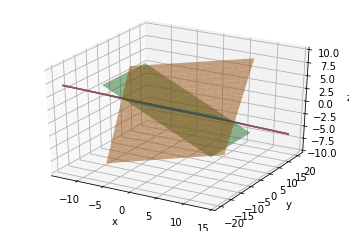

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

circle1 = circle(0,   0, -1)
circle2 = circle(0,  .5, .5)
circle3 = circle(0.666666666666666, -0.0, 0.3333333333333333)

# circle1 = circle(0,   0, -1)
# circle2 = circle(0,  .5, .5)
# circle3 = circle(0, -.5, .5)

A,b = equation_subtract(circle1,circle2,circle3)

plane1 = np.append(A[0,:], b[0])
plane2 = np.append(A[1,:], b[1])
plane3 = np.append(A[2,:], b[2])


ax.plot_surface(*get_plane(plane1), alpha=0.5)
ax.plot_surface(*get_plane(plane2), alpha=0.5)
ax.plot_surface(*get_plane(plane3), alpha=0.5);

ax.plot(*intersect(plane1, plane2))
ax.plot(*intersect(plane2, plane3))
ax.plot(*intersect(plane3, plane1));

# plt.show();

In [8]:
# with the equation of a line

In [9]:
def get_line(plane1, plane2):
    direction = np.cross(plane1[:3],plane2[:3])
    i = np.argmax(np.abs(direction[:3]))
    
    if abs(direction[i]) < 1e-6:
        print(direction[:3], i)
        print("here")
        return
    
    intercept = np.zeros_like(direction)
    
    b = [plane1[3], plane2[3]]
    
    j = np.arange(3)
    
    A = np.array([plane1[:3][i != j], plane2[:3][i != j]])
    
    intercept[j[i != j]] = np.linalg.solve(A,b)  
#     print(direction, intercept)
    
    
    return [[direction[i],intercept[i]] for i in range(len(direction))]

In [29]:
def get_circle(circle1,circle2,circle3, mode='___bigger_circles'):

    equality = min(abs(circle1[1]),abs(circle2[1]),abs(circle3[1]))
    
    A,b = equation_subtract(circle1,circle2,circle3)

    plane1 = np.append(A[0,:], b[0])
    plane2 = np.append(A[1,:], b[1])
    
    (x0,x1), (y0,y1), (z0,z1) = get_line(plane1, plane2)
    
    ai, bi = circle3[0]
    Ri = circle3[1]
    
#     print(x0**2 + y0**2 - z0**2)
#     print(2*(x0*(x1-ai) + y0*(y1-bi) - z0*(z1+Ri)))
    
    
    w0 = x0**2 + y0**2 - z0**2
    w1 = 2*(x0*(x1-ai) + y0*(y1-bi) - z0*(z1+Ri))
    w2 = (x1-ai)**2 + (y1-bi)**2 - (z1+Ri)**2
    
    tol = 1e-12
    if abs(w0) < tol:
        t = -w2/w1
        circ1 = circle(*np.array([x0,y0,z0])*t+[x1,y1,z1])
        
        if mode == 'bigger_circles': 
            circ1_valid = circ1[1] > 0
        else:
            circ1_valid =  abs(circ1[1]) < equality
        circ2_valid = False
    else:
        t = quadratic_eq(w0,w1,w2)
    
        circ1 = circle(*np.array([x0,y0,z0])*t[0]+[x1,y1,z1])
        circ2 = circle(*np.array([x0,y0,z0])*t[1]+[x1,y1,z1])
    
        if mode == 'bigger_circles': 
            circ1_valid = circ1[1] > 0
            circ2_valid = circ2[1] > 0
            
        else:
            circ1_valid =  abs(circ1[1]) < equality
            circ2_valid =  abs(circ2[1]) < equality
        
    if circ1_valid and circ2_valid:
        return [circ1,circ2] # change to return both
    elif circ1_valid:
        return [circ1]
    elif circ2_valid: 
        return [circ2]

In [30]:
# seed_circles
circles = [circle(0, 0, -1), circle(0,.5, .5), circle(0,-.5, .5)]
parents = {3:(0,1,2),4:(0,1,2)}
circ1, circ2 = get_circle(*circles)
circles.append(circ1)
circles.append(circ2)
# print(circles)

c = 5
for i in range(3,2000):  
#     print(parents[i])
    new_circs = list(combinations([*parents[i],i],3))
    new_circs.remove(parents[i])
#     print(new_circs)
    for j,v in enumerate(new_circs):
#         print(v)
        seeds = [circles[v[0]], circles[v[1]], circles[v[2]]]
#         print(i)
#         print(seeds)
        circ = get_circle(*seeds)
#         print()
#         print(seeds)
#         print(*seeds)
#         print(circ)
        if len(circ)>1:
            
            circles.append(circ[0])
#             print(circ[0])
            parents[c] = tuple(v)
            c+=1
            circles.append(circ[1])
            parents[c] = tuple(v)
            c+=1
            

        else:
#             print(circ)
            circles.append(*circ)
            parents[c] = tuple(v)
            c+=1
        
#         print(circles)
# circles
# parents

In [31]:
_white = (.2,.3,.5)
_black = (.3,.4,.6)

def c_map(t, c0=_black, c1=_white):
    t = abs(t)
    return ((c1[0]-c0[0])*t + c0[0], 
            (c1[1]-c0[1])*t + c0[1], 
            (c1[2]-c0[2])*t + c0[2])       

# print(c_map(1))

In [32]:
print(len(circles))

5996


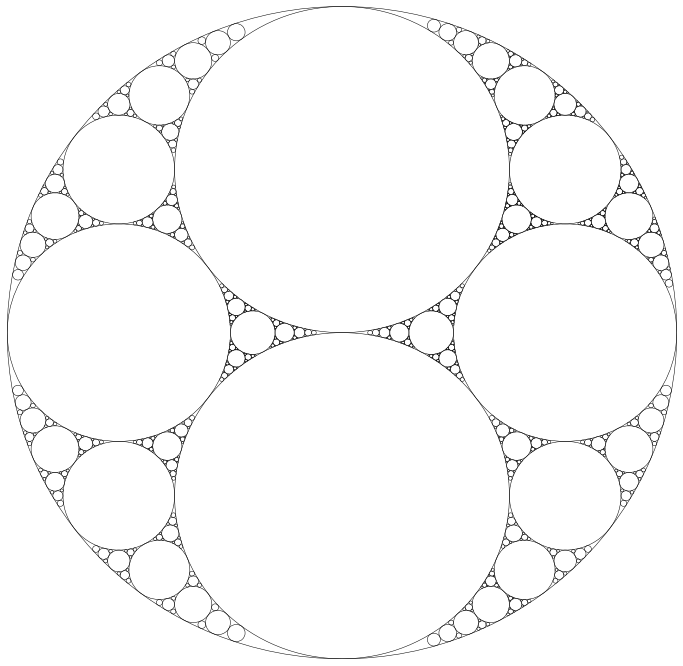

In [33]:
fig, ax = plt.subplots(figsize=(12,12))


for circ in circles[:1000]:
#     print(circ[1])
    ax.add_artist(plt.Circle(*circ, 
                             alpha=1, 
                             color='black',
                             fill=False,
                             lw = 0.5))

# print(circle4[0])
# print(circle4[1])

ax.set_xticks([])
ax.set_yticks([])

ax.set_ylim((-1,1))
ax.set_xlim((-1,1))

plt.axis('off')
# plt.savefig("circle_fractal.png", bbox_inches="tight",dpi=1000, format='PNG')


plt.show()

In [40]:
# seed_circles
circles = [circle(1, 0, .5), circle(0,.5, .5), circle(0,-.5, .5)]
parents = {3:(0,1,2)}
circ1 = get_circle(*circles, mode='bigger_circles')
circles.append(*circ1)
# print(circles)


c = 4
for i in range(3,800):
#     print(parents[i])
    new_circs = list(combinations([*parents[i],i],3))
    new_circs.remove(parents[i])
#     print(new_circs)
    for j,v in enumerate(new_circs):
#         print(v)
        seeds = [circles[v[0]], circles[v[1]], circles[v[2]]]
#         print(i)
#         print(seeds)
#         print(seeds)
        circ = get_circle(*seeds, mode='bigger_circles')
#         print(*seeds)
#         print(circ)
        if circ == None:
            continue
        if len(circ)>1:
            
            circles.append(circ[0])
#             print(circ[0])
            parents[c] = tuple(v)
            c+=1
            circles.append(circ[1])
            parents[c] = tuple(v)
            c+=1
            

        else:
#             print(circ)
            circles.append(*circ)
            parents[c] = tuple(v)
            c+=1
        
#         print(circles)
# circles
# parents

In [41]:
# circles = [[(0.17142857142857143, -0.0), 0.028571428571428567], [(0.19607843137254902, 0.029411764705882325), 0.009803921568627472], [(0.19867549668874174, 0.016556291390728374), 0.0033112582781457045]]
# parents = {3:(0,1,2)}
# circ1 = get_circle(*circles)
# circles.append(*circ1)

# # print(circles[3])
# # circ1 = get_circle(circles[1],circles[2],circles[3])
# # circles.append(*circ1)


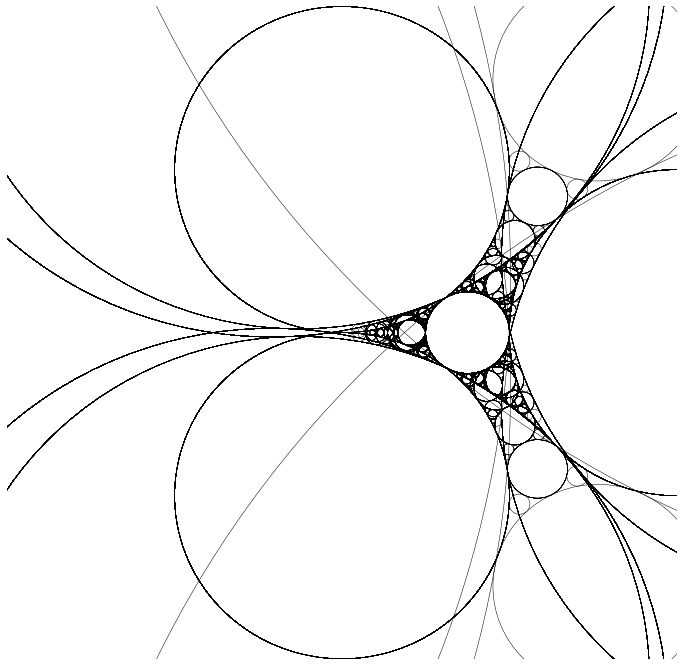

In [42]:
fig, ax = plt.subplots(figsize=(12,12))


for circ in circles[:]:
#     print(circ[1])
    ax.add_artist(plt.Circle(*circ, 
                             alpha=1, 
                             color='black',
                             fill=False,
                             lw = 0.5))

# print(circle4[0])
# print(circle4[1])

ax.set_xticks([])
ax.set_yticks([])

ax.set_ylim((-1,1))
ax.set_xlim((-1,1))

plt.axis('off')
# plt.savefig("circle_fractal.png", bbox_inches="tight",dpi=1000, format='PNG')


plt.show()